# Data Analysis and Visualization 

## Tasks:
You are given three csv files, you are to:- Clean, model and analyze data to create valuable insights for the client

## Data Exploration and Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load first csv file

In [2]:
content = pd.read_csv('data/Content.csv')
content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [3]:
# Let's explore the target column
content.Category.value_counts()

Category
technology           71
animals              67
travel               67
culture              63
science              63
fitness              61
food                 61
healthy eating       61
cooking              60
soccer               58
tennis               58
education            57
dogs                 56
studying             55
veganism             48
public speaking      48
Fitness               5
Animals               4
Science               4
"soccer"              3
"culture"             3
Soccer                3
"dogs"                2
Education             2
Studying              2
Travel                2
Food                  2
"veganism"            1
"public speaking"     1
Public Speaking       1
"technology"          1
"cooking"             1
Healthy Eating        1
"studying"            1
"food"                1
Culture               1
"tennis"              1
Technology            1
"animals"             1
Veganism              1
"science"             1
Name: c

As seen above, some entries are in capital letters, some in lower case and some are also in double quotation marks.

We will clean this data for uniformity

In [4]:
# Drop unwanted columns
content.drop(columns=[content.columns[0], 'User ID', 'URL'], axis=1, inplace=True)

# Rename the Type column as ContentType
content.rename(columns={'Type': 'ContentType'}, inplace=True)

# Remove pdouble quotation marks and convert all entries to lower case in Category column 
content["Category"] = content["Category"].str.replace('"', '').str.lower()
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Content ID   1000 non-null   object
 1   ContentType  1000 non-null   object
 2   Category     1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [5]:
content.head()

,Content ID,ContentType,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [6]:
content.Category.value_counts()

Category
technology         73
animals            72
travel             69
science            68
culture            67
fitness            66
food               64
soccer             64
healthy eating     62
cooking            61
tennis             59
education          59
studying           58
dogs               58
public speaking    50
veganism           50
Name: count, dtype: int64

In [7]:
content.isnull().sum()

Content ID     0
ContentType    0
Category       0
dtype: int64

### Load second csv file 

In [8]:
reactions = pd.read_csv('data/Reactions.csv')
reactions.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [9]:
# Drop unwanted columns
reactions.drop(columns=[reactions.columns[0], 'User ID'], axis=1, inplace=True)

# Drop rows with missing values
reactions.dropna(inplace=True)

# Rename Type column to ReactionType
reactions.rename(columns={'Type': 'ReactionType'}, inplace=True)

reactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24573 entries, 1 to 25552
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Content ID    24573 non-null  object
 1   ReactionType  24573 non-null  object
 2   Datetime      24573 non-null  object
dtypes: object(3)
memory usage: 767.9+ KB


In [10]:
# Load first five rows of cleaned data
reactions.head()

,Content ID,ReactionType,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [11]:
# Confirm there is no missing values in cleaned data
reactions.isnull().sum()

Content ID      0
ReactionType    0
Datetime        0
dtype: int64

### Load Third csv file

In [12]:
reaction_types = pd.read_csv('data/ReactionTypes.csv')
reaction_types.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [13]:
reaction_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16 non-null     int64 
 1   Type        16 non-null     object
 2   Sentiment   16 non-null     object
 3   Score       16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 644.0+ bytes


In [14]:
# check for missing values
reaction_types.isnull().sum()

Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64

In [15]:
#Drop unwanted columns
reaction_types.drop(columns=reaction_types.columns[0], inplace=True)

# Rename Type column as ReactionType
reaction_types.rename(columns={'Type': 'ReactionType'}, inplace=True)

# load first five rows of cleaned data
reaction_types.head()

,ReactionType,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


## Data Modeling
- Create a final data set by merging your three tables together

In [16]:
# Merge the reactions and content table
df_merged = pd.merge(reactions, content, on='Content ID', how='inner')
df_merged.head()

,Content ID,ReactionType,Datetime,ContentType,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying


In [17]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Content ID    24573 non-null  object
 1   ReactionType  24573 non-null  object
 2   Datetime      24573 non-null  object
 3   ContentType   24573 non-null  object
 4   Category      24573 non-null  object
dtypes: object(5)
memory usage: 960.0+ KB


In [18]:
# merge the resulting table (df_merged) with the reaction_types table
df_final = pd.merge(df_merged, reaction_types, on='ReactionType', how='inner')

#### Create columns to extract Day and Month from datetime

In [19]:
# Convert 'Datetime' column to datetime format
df_final['Datetime'] = pd.to_datetime(df_final['Datetime'])

# Extract month from 'Datetime' column
df_final['Month'] = df_final['Datetime'].dt.month_name()

# Extract Day from 'Datetime' column
df_final['Day'] = df_final['Datetime'].dt.strftime('%A')

In [20]:
df_final.head()

,Content ID,ReactionType,Datetime,ContentType,Category,Sentiment,Score,Month,Day
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0,November,Saturday
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0,January,Wednesday
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,studying,negative,0,April,Friday
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,healthy eating,negative,0,March,Sunday
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,healthy eating,negative,0,August,Tuesday


#### Save cleaned and modelled file

In [21]:
# Save the Cleaned and modeled file
df_final.to_csv("data/final_data_file.csv", index=False)

## Data Analysis and Visualizations

#### Check unique values for Categories, Content types and reaction types

In [22]:
print('Categories: ', df_final.Category.nunique())
print('Content Types: ', df_final.ContentType.nunique())
print('Reaction Types: ', df_final.ReactionType.nunique())

Categories:  16
Content Types:  4
Reaction Types:  16


The modeled data has 16 different content categories, 4 content types and 16 reaction types

#### Create Data of Top 5 performing categories

In [23]:
# Get a sum value of the scores for each category
category_totals = df_final.groupby('Category')['Score'].sum()
sorted_categories = category_totals.sort_values(ascending=False)
top_5_categories = sorted_categories.head()
top_5_categories

Category
animals           74965
science           71168
healthy eating    69339
technology        68738
food              66676
Name: Score, dtype: int64

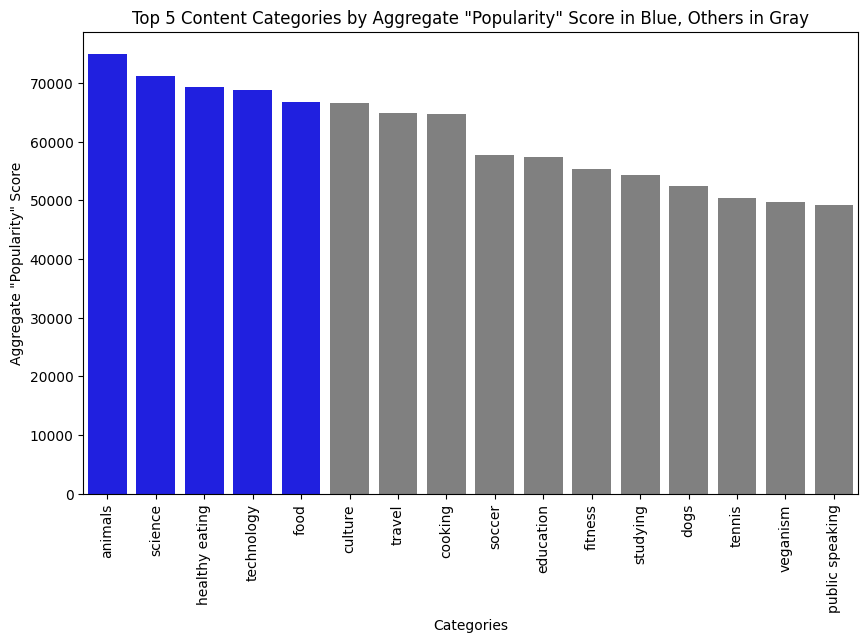

In [24]:
# Create the bar chart for categories
fig, ax = plt.subplots(figsize=(10, 6))
palette = ['blue' if Category in sorted_categories.head(5).index else 'gray' for Category in sorted_categories.index]
sns.barplot(x=sorted_categories.index, y=sorted_categories.values, hue=sorted_categories.index, palette=palette)
ax.tick_params(axis='x', labelrotation=90)
# add labels, titles, and other customizations
plt.ylabel('Aggregate "Popularity" Score')
plt.xlabel('Categories')
plt.title('Top 5 Content Categories by Aggregate "Popularity" Score in Blue, Others in Gray')
plt.show()

From above result we can see that The top five categories with the highest scores are animals, science, healthy eating, technology and food, accordingly

In [25]:
## Create DataFrame of Top 5 categories
top_5_df = df_final[df_final['Category'].isin(top_5_categories.index)]
top_5_df.head()

,Content ID,ReactionType,Datetime,ContentType,Category,Sentiment,Score,Month,Day
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,healthy eating,negative,0,March,Sunday
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,healthy eating,negative,0,August,Tuesday
10,5118e9c5-1377-4cc5-a486-65b35b7b7b76,disgust,2020-11-07 08:49:52,GIF,science,negative,0,November,Saturday
15,81abd65a-3b76-4574-a0a7-db6bf7184ae2,disgust,2020-12-08 13:12:56,video,food,negative,0,December,Tuesday
16,81abd65a-3b76-4574-a0a7-db6bf7184ae2,disgust,2021-01-05 13:15:46,video,food,negative,0,January,Tuesday


In [26]:
top_5_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, 3 to 24565
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Content ID    8807 non-null   object        
 1   ReactionType  8807 non-null   object        
 2   Datetime      8807 non-null   datetime64[ns]
 3   ContentType   8807 non-null   object        
 4   Category      8807 non-null   object        
 5   Sentiment     8807 non-null   object        
 6   Score         8807 non-null   int64         
 7   Month         8807 non-null   object        
 8   Day           8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 688.0+ KB


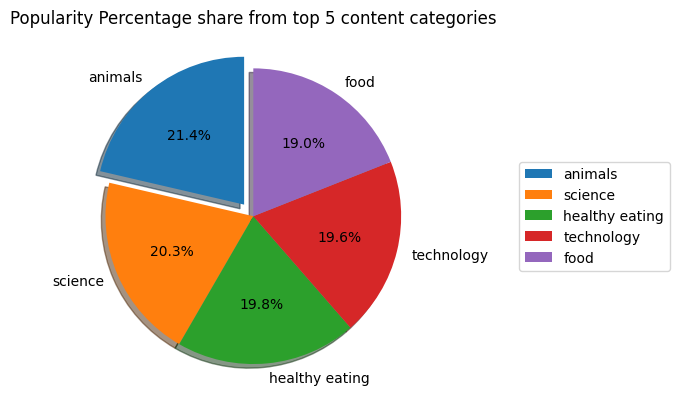

In [27]:
# Create the pie chart for Top 5 categories
explode = (0.1, 0, 0, 0, 0)
plt.pie(x=top_5_categories,  labels=top_5_categories.index, autopct='%1.1f%%', shadow=True, explode=explode, startangle=90)
plt.title('Popularity Percentage share from top 5 content categories');
plt.legend(loc="center left", bbox_to_anchor=(1.2, 0, 0.5, 1))
plt.show()

#### Most Popular Content Category

In [28]:
# Find the most popular category
most_popular_category = top_5_df.groupby('Category')['Score'].sum().idxmax()

print(f'The Most popular content category is {most_popular_category}')

The Most popular content category is animals


In [29]:
# Filter data to create a subset for the most popular category 
popular_category_data = top_5_df[top_5_df['Category'] == most_popular_category]

# Calculate total reactions for most popular category 
most_popular_reaction = popular_category_data.groupby('ReactionType')['Score'].sum().idxmax()
print(f'The most popular reaction type to {most_popular_category} posts is {most_popular_reaction}')


The most popular reaction type to animals posts is super love


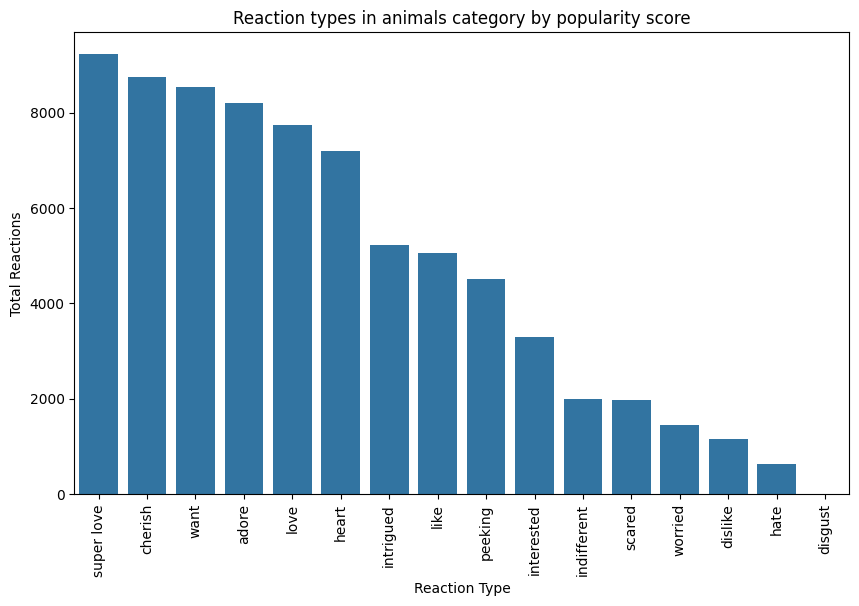

In [30]:
# Calculate total reactions for each reaction type
reactions_by_type = popular_category_data.groupby('ReactionType')['Score'].sum()

# Create a bar chart with ordered bars
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
            x=reactions_by_type.index, 
            y=reactions_by_type.values, 
            order=reactions_by_type.sort_values(ascending=False).index,
            ax=ax
        )
ax.tick_params(axis='x', labelrotation=90)
plt.xlabel('Reaction Type')
plt.ylabel('Total Reactions')
plt.title(f'Reaction types in {most_popular_category} category by popularity score')
plt.show()

In [31]:
total_reaction = (popular_category_data.ReactionType.value_counts()).sum()
total_reaction
print(f'The Total Reactions to {most_popular_category} posts is {total_reaction}')

The Total Reactions to animals posts is 1897


#### The Month with the Most Posts

In [32]:
posts_per_month = df_final["Month"].value_counts().sort_values(ascending=False)
posts_per_month_reordered = posts_per_month.reindex(
    ['January', 'February', 'March', 
     'April', 'May', 'June', 
     'July', 'August', 'September', 
     'October', 'November', 'December']
).reset_index()
posts_per_month_reordered.columns = ['Month', 'Value']
posts_per_month_reordered.head()

,Month,Value
0,January,2126
1,February,1914
2,March,2012
3,April,1974
4,May,2138


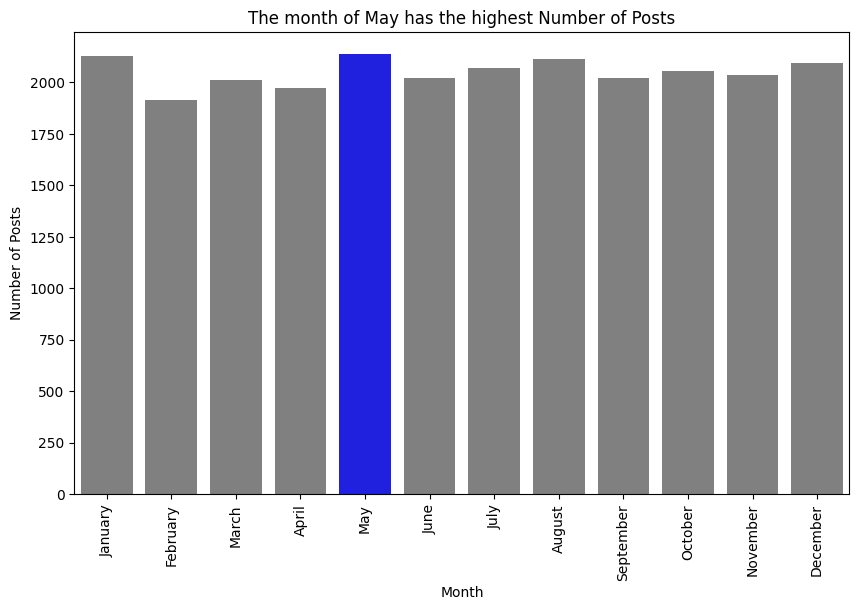

In [33]:
# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
palette = ['blue' if month in posts_per_month.head(1).index else 'gray' for month in posts_per_month_reordered['Month'].values]
sns.barplot(data=posts_per_month_reordered, x='Month', y='Value', ax=ax, palette=palette, hue='Month')
ax.tick_params(axis='x', labelrotation=90)
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.title('The month of May has the highest Number of Posts');
plt.show()

In [34]:
print(f'The Month with the most posts is {posts_per_month.index[0]}')

The Month with the most posts is May


#### The Day of the Week with the Most Posts

In [35]:
day_of_week = df_final["Day"].value_counts().sort_values(ascending=False)
day_of_week_reordered = day_of_week.reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
day_of_week_reordered

Day
Sunday       3529
Monday       3581
Tuesday      3534
Wednesday    3465
Thursday     3516
Friday       3552
Saturday     3396
Name: count, dtype: int64

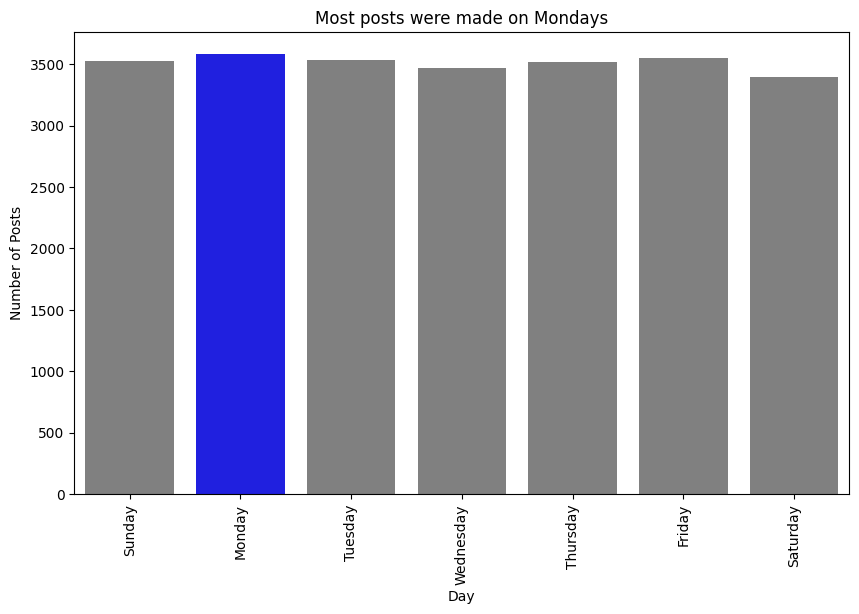

In [36]:
# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
palette = ['blue' if day in day_of_week.head(1).index else 'gray' for day in day_of_week_reordered.index]
sns.barplot(x=day_of_week_reordered.index, y=day_of_week_reordered.values, ax=ax, palette=palette, hue=day_of_week_reordered.index)
ax.tick_params(axis='x', labelrotation=90)
plt.xlabel('Day')
plt.ylabel('Number of Posts')
plt.title('Most posts were made on Mondays');
plt.show()

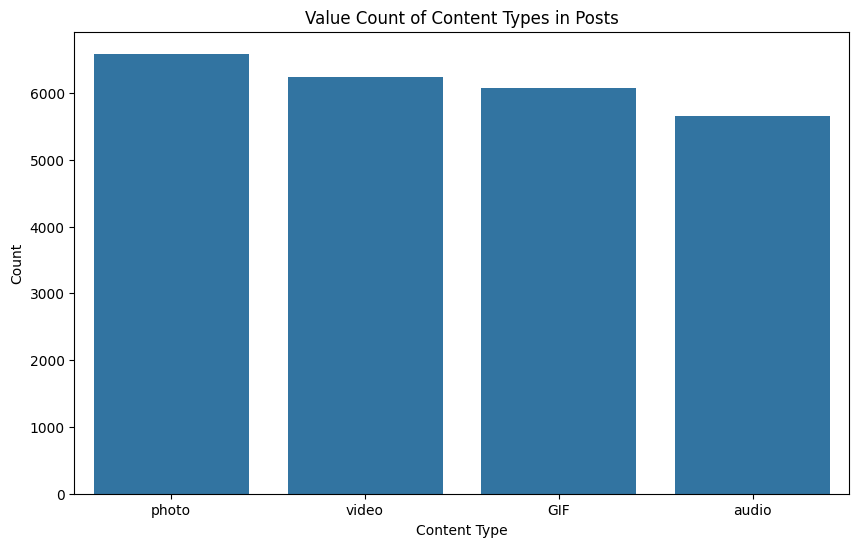

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(df_final, x='ContentType', ax=ax)
# add labels, titles, and other customizations
plt.ylabel('Count')
plt.xlabel('Content Type')
plt.title('Value Count of Content Types in Posts')
plt.show()

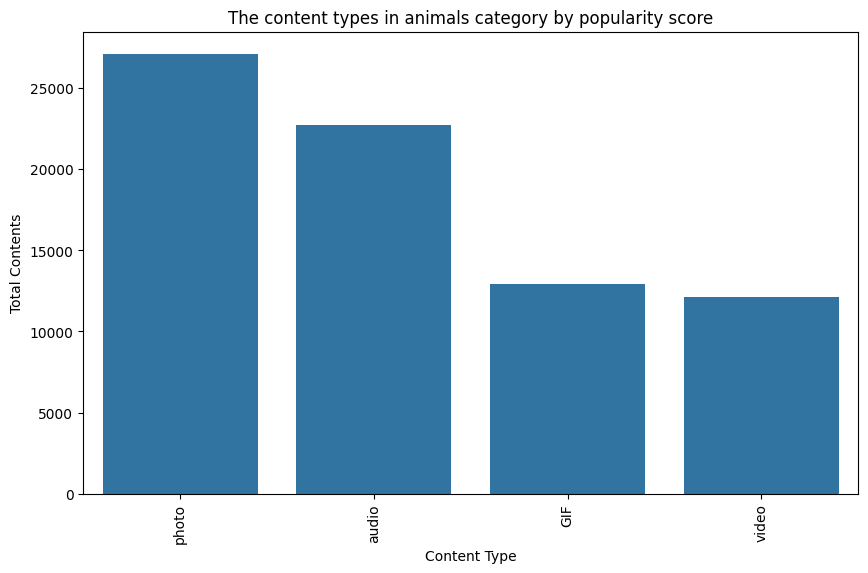

In [38]:
# Calculate total content for each content type
content_by_type = popular_category_data.groupby('ContentType')['Score'].sum()

# Create a bar chart with ordered bars
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=content_by_type.index, y=content_by_type.values, order=content_by_type.sort_values(ascending=False).index, ax=ax)
ax.tick_params(axis='x', labelrotation=90)
plt.xlabel('Content Type')
plt.ylabel('Total Contents')
plt.title(f'The content types in {most_popular_category} category by popularity score')
plt.show()

### Summary
- Animals and Science are the two most popular content categories, showing that people enjoy contents centred around "life" and "knowledge" the most.
- Users reacted most to contents posted on Mondays and in the month of May. This may give insight into the particular posts that interested them the most and be used to improve on contents posted, to increase user engagement. 